In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

/var/folders/8t/_xbd4d4117l1s7h5p9tj9rxr0000gn/T/ipykernel_831/2725848234.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [14]:
df = pd.read_excel('CBA.AX5y.xls')

In [15]:
df.columns = df.columns.str.lower()

In [16]:
df = df.drop(labels = ['open', 'high', 'low', 'adj close', 'volume'], axis=1)

In [17]:
df.shape

(1267, 2)

In [18]:
df.dtypes

date     datetime64[ns]
close           float64
dtype: object

In [19]:
df

,date,close
0,2017-09-21,76.070000
1,2017-09-22,76.620003
2,2017-09-25,75.809998
3,2017-09-26,75.099998
4,2017-09-27,74.849998
...,...,...
1262,2022-09-15,95.059998
1263,2022-09-16,94.230003
1264,2022-09-19,94.660004
1265,2022-09-20,96.529999


### ARIMA (AutoRegressive Integrated Moving Average) for Time Series Prediction

In [20]:
df['date'][1266]

Timestamp('2022-09-21 00:00:00')

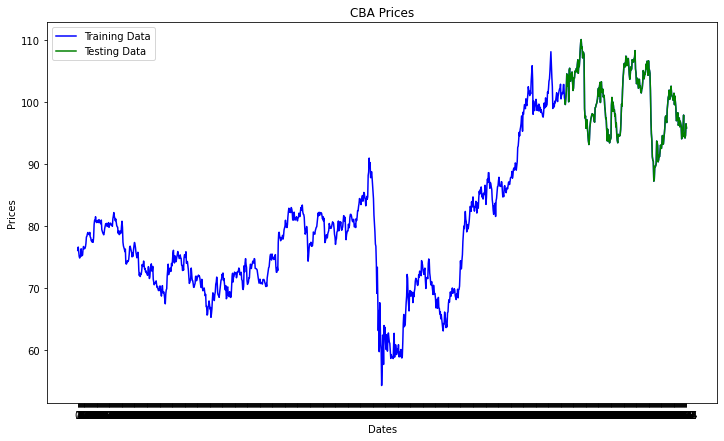

In [25]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('CBA Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['close'], 'blue', label='Training Data')
plt.plot(test_data['close'], 'green', label='Testing Data')
plt.xticks(np.arange(0,1266), label = df['date'])
plt.legend()